In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

In [44]:
with open('all_df_properties.json') as f:
    dataset_properties = json.load(f)  # Assume multiple datasets are in this format

properties = []
for data in dataset_properties:
    name = data['name']
    dataset = data['dataset']
    multi_di_graph = data['multi_di_graph']

    properties.append({
        'Dataset': name,
        # 'Multi-class Gini': dataset['Multi-class Gini Coefficient'],
        # 'Binary Gini': dataset['Binary Classification Gini Coefficient'],
        # 'Percentage Benign': dataset['percentage_of_benign_records'],
        # 'Percentage Attack': dataset['percentage_of_attack_records'],
        # 'number_of_nodes': multi_di_graph['graph_measures']['number_of_nodes'],
        # 'number_of_edges': multi_di_graph['graph_measures']['number_of_edges'],
        # 'max_degree': multi_di_graph['graph_measures']['max_degree'],
        # 'avg_degree': multi_di_graph['graph_measures']['avg_degree'],
        'density': multi_di_graph['graph_measures']['density'],
        # 'degree_skewness': multi_di_graph['degree_skewness'],
        # 'degree_kurtosis': multi_di_graph['degree_kurtosis'],
        'degree_alpha': multi_di_graph['degree_alpha'],
        # 'degree_entropy': multi_di_graph['degree_entropy'],
        'degree_relative_entropy': multi_di_graph['degree_relative_entropy'],
        'degree_scale_free': multi_di_graph['degree_scale_free'],
        # 'pagerank_skewness': multi_di_graph['pagerank_skewness'],
        # 'pagerank_entropy': multi_di_graph['pagerank_entropy'],
        'pagerank_relative_entropy': multi_di_graph['pagerank_relative_entropy'],
        'pagerank_alpha': multi_di_graph['pagerank_alpha'],
        'pagerank_scale_free': multi_di_graph['pagerank_scale_free'],
        # 'intersection between attacks and victims': multi_di_graph['intersection between attacks and victims'],
        'Proportion of Attackers': multi_di_graph['Proportion of Attackers'],
        # 'Proportion of Victims': multi_di_graph['Proportion of Victims'],
        # 'Mean Clustering Coefficient': multi_di_graph['Mean Clustering Coefficient'],
        # 'Degree Assortativity': multi_di_graph['Graph Degree Assortativity Coefficient'],
        # 'Mean Path Length': multi_di_graph['Mean Path Length'],
    })
# properties

In [45]:
properties_df = pd.DataFrame(properties)
properties_df

,Dataset,degree_relative_entropy,degree_scale_free,pagerank_relative_entropy,pagerank_scale_free
0,cic_ton_iot,0.174882,0,0.010834,0
1,cic_ids_2017,0.440548,1,0.830852,1
2,cic_bot_iot,0.503829,0,0.532433,0
3,cic_ton_iot_modified,0.176466,0,0.019362,0
4,ccd_inid_modified,0.814577,0,0.703732,0
5,nf_uq_nids_modified,0.687675,0,0.733947,0
6,edge_iiot,0.021798,0,0.063423,0
7,nf_cse_cic_ids2018,0.239182,0,0.259530,0
8,nf_uq_nids,0.240163,0,0.268201,0
9,x_iiot,0.829736,0,0.814292,1


In [46]:
models = ['e_gcn', 'e_graph_sage', 'e_gat']
# models = ['e_gcn', 'e_gat']
# models = ['e_gcn', 'e_graph_sage']
f1_scores = pd.read_csv('f1_scores.csv', usecols=['Dataset'] + models)
f1_scores

,Dataset,e_gcn,e_gat
0,cic_ids_2017,96.050,96.930
1,cic_ton_iot_modified,80.210,80.490
2,ccd_inid_modified,71.150,77.510
3,x_iiot,77.820,77.122
4,edge_iiot,91.480,91.790
5,cic_ton_iot,79.530,81.650
6,nf_uq_nids,79.102,53.230


In [47]:
# f1_scores['mean_edge'] = f1_scores[['e_gcn', 'e_graph_sage', 'e_gat']].mean(axis=1)
# f1_scores['mean_centralities'] = f1_scores[['nodes_e_gcn', 'nodes_e_graph_sage', 'nodes_e_gat']].mean(axis=1)
# f1_scores['mean_line_graph'] = f1_scores[['line_graph_gcn', 'line_graph_graphsage', 'line_graph_gat']].mean(axis=1)

# f1_scores['mean_gcn'] = f1_scores[['e_gcn', 'nodes_e_gcn', 'line_graph_gcn']].mean(axis=1)
# f1_scores['mean_graphsage'] = f1_scores[['e_graph_sage', 'nodes_e_graph_sage', 'line_graph_graphsage']].mean(axis=1)
# f1_scores['mean_gat'] = f1_scores[['e_gat', 'nodes_e_gat', 'line_graph_gat']].mean(axis=1)
# f1_scores

In [48]:
# Ensure Dataset names match across both data sources
f1_scores['Dataset'] = f1_scores['Dataset'].str.strip().str.lower()
properties_df['Dataset'] = properties_df['Dataset'].str.strip().str.lower()

# Step 4: Merge properties and F1-scores
merged_df = pd.merge(properties_df, f1_scores, on='Dataset')
merged_df

,Dataset,degree_relative_entropy,degree_scale_free,pagerank_relative_entropy,pagerank_scale_free,e_gcn,e_gat
0,cic_ton_iot,0.174882,0,0.010834,0,79.530,81.650
1,cic_ids_2017,0.440548,1,0.830852,1,96.050,96.930
2,cic_ton_iot_modified,0.176466,0,0.019362,0,80.210,80.490
3,ccd_inid_modified,0.814577,0,0.703732,0,71.150,77.510
4,edge_iiot,0.021798,0,0.063423,0,91.480,91.790
5,nf_uq_nids,0.240163,0,0.268201,0,79.102,53.230
6,x_iiot,0.829736,0,0.814292,1,77.820,77.122


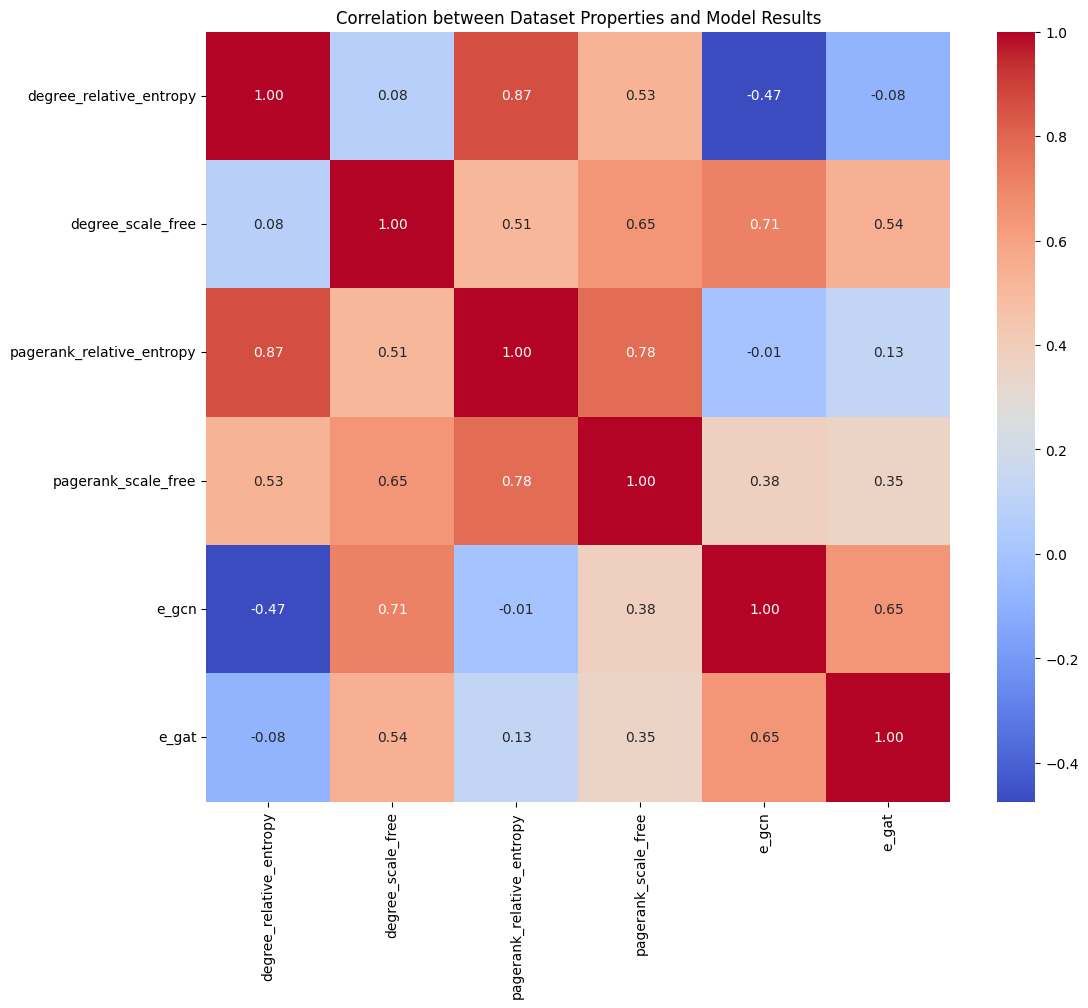

In [49]:
# Remove non-numeric columns for correlation calculation
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Step 5: Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Dataset Properties and Model Results')
plt.show()

# Datasets Clustering

In [50]:
feature_columns = list(properties_df.columns.drop("Dataset"))

In [51]:

# from sklearn.cluster import KMeans
# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# features = merged_df[feature_columns]
# merged_df['Cluster'] = kmeans.fit_predict(features)

# # Display datasets with their assigned clusters
# print("\nDatasets grouped into clusters:")
# print(merged_df[['Dataset', 'Cluster']])

# # Step 6: Visualize the clusters (optional)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     x='Mean Clustering Coefficient', 
#     y='Degree Assortativity', 
#     hue='Cluster', 
#     data=merged_df, 
#     palette='viridis', 
#     style='Cluster', 
#     s=100
# )
# plt.title('Dataset Clusters based on Features')
# plt.xlabel('Mean Clustering Coefficient')
# plt.ylabel('Degree Assortativity')
# plt.legend(title='Cluster')
# plt.show()


In [52]:
merged_df.all()

Dataset                       True
degree_relative_entropy       True
degree_scale_free            False
pagerank_relative_entropy     True
pagerank_scale_free          False
e_gcn                         True
e_gat                         True
dtype: bool

In [53]:
# merged_df[["Dataset", "Proportion of Attackers", "mean_edge", "mean_centralities", "mean_line_graph", "Cluster"]]

In [54]:
# cluster_features = merged_df.groupby('Cluster')[feature_columns].mean()
# print("\nAverage feature values for each cluster:")
# print(cluster_features)

In [55]:
# models = ["e_gcn","e_graph_sage","e_gat","nodes_e_gcn","nodes_e_graph_sage","nodes_e_gat","line_graph_gcn","line_graph_graphsage","line_graph_gat"]
# models = ["e_gcn","e_graph_sage","e_gat"]
# models_mean = ["mean_edge","mean_centralities","mean_line_graph"]

In [56]:
# feature = 'density'
# for m in models_mean:
#     sns.lineplot(data=merged_df, x=feature, y=m, label=m)
    
# plt.title(f'{feature} vs models F1-score')
# plt.xlabel(feature)
# plt.ylabel(f'models F1-score')
# plt.legend(title="Models")  # Add legend with a title
# plt.show()

In [57]:
feature = 'density'
for m in models:
    sns.lineplot(data=merged_df, x=feature, y=m, label=m)
    
plt.title(f'{feature} vs models F1-score')
plt.xlabel(feature)
plt.ylabel(f'models F1-score')
plt.legend(title="Models")  # Add legend with a title
plt.show()

ValueError: Could not interpret value `density` for `x`. An entry with this name does not appear in `data`.

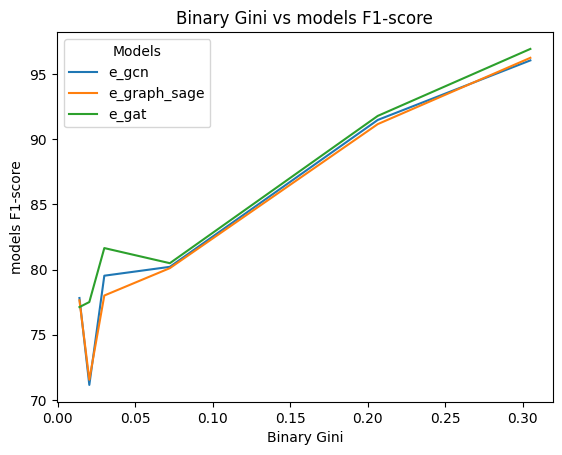

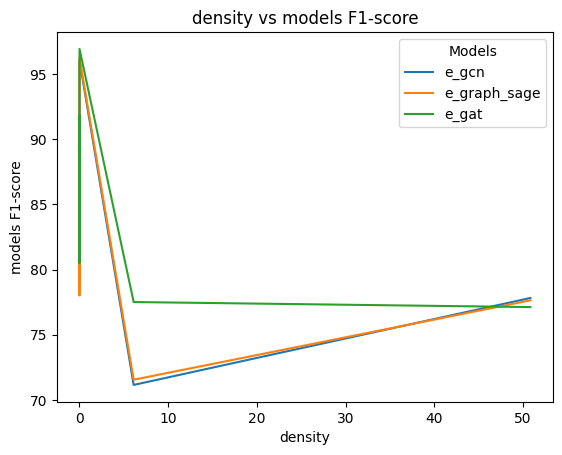

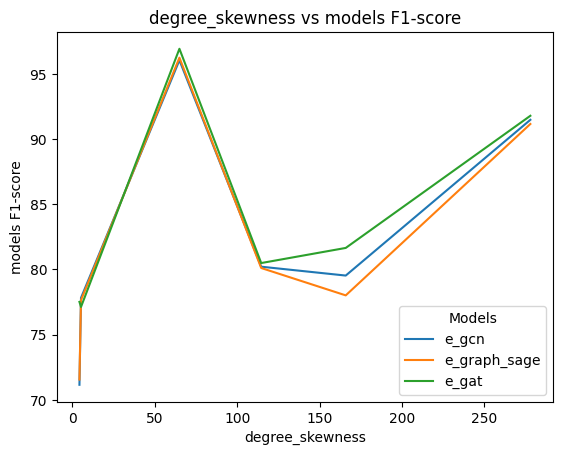

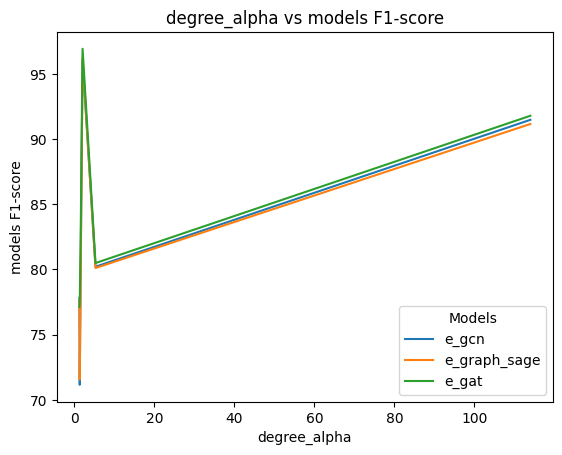

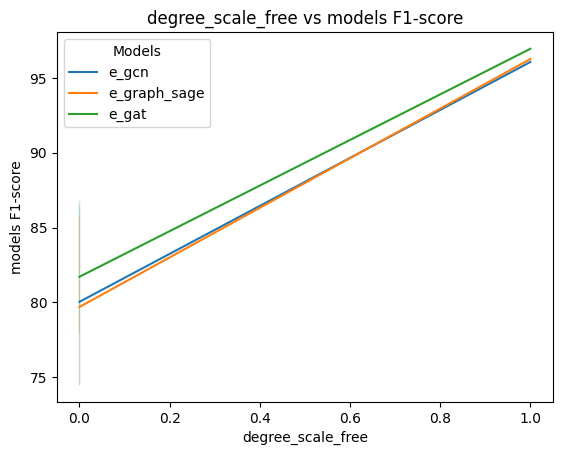

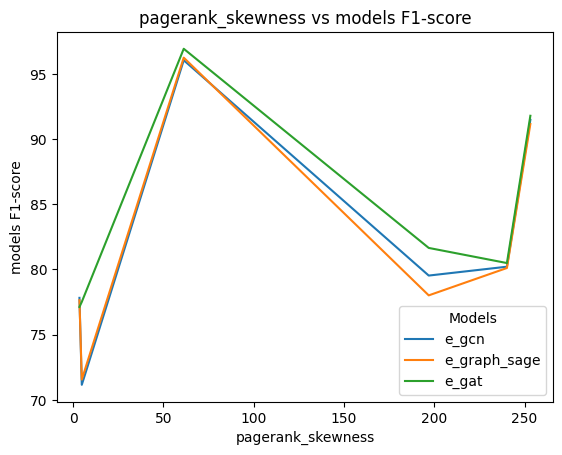

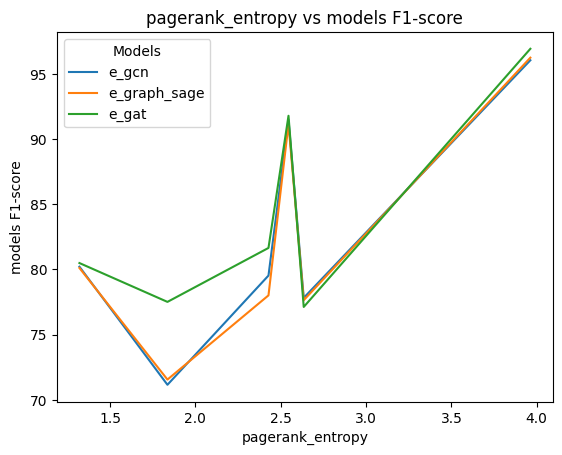

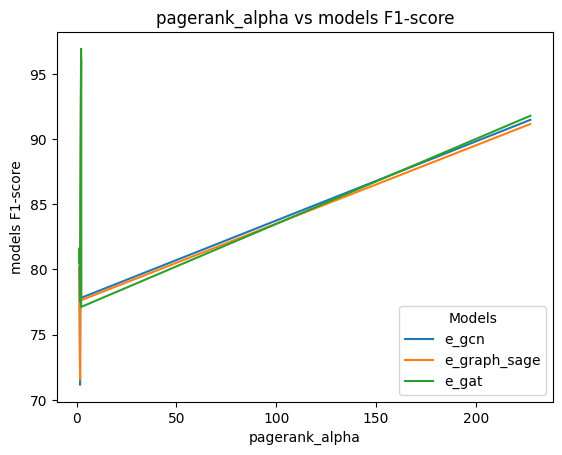

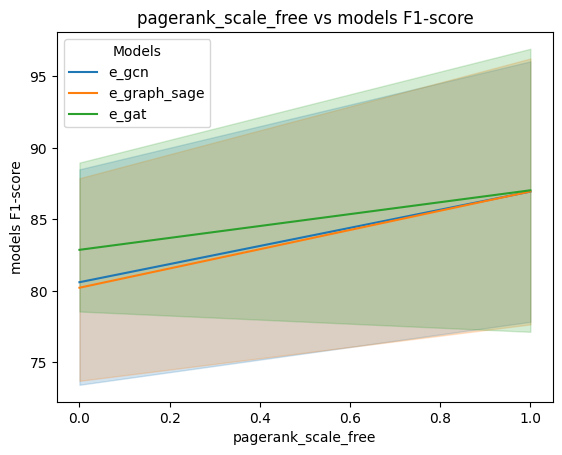

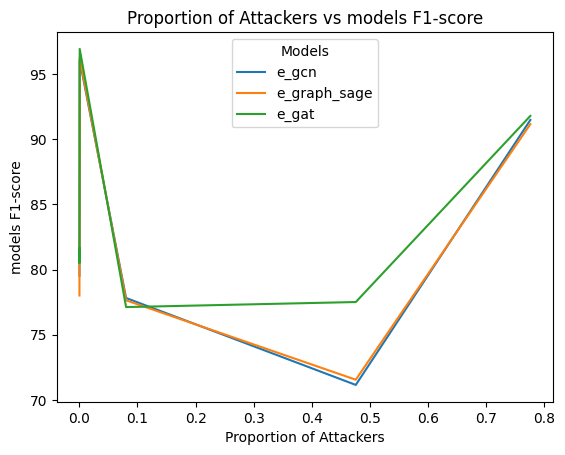

In [87]:
for feature in feature_columns:
    for m in models:
        sns.lineplot(data=merged_df, x=feature, y=m, label=m)  # Add label for the model
    plt.title(f'{feature} vs models F1-score')
    plt.xlabel(feature)
    plt.ylabel('models F1-score')
    plt.legend(title="Models")  # Add legend with a title
    plt.show()


In [68]:
# models = ['e_gcn', 'e_graph_sage', 'e_gat']
# models = ['nodes_e_gcn', 'nodes_e_graph_sage', 'nodes_e_gat']
# models = ['line_graph_gcn', 'line_graph_graphsage', 'line_graph_gat']

In [69]:
# for feature in feature_columns:
#     for m in models:
#         sns.lineplot(data=merged_df, x=feature, y=m, label=m)  # Add label for the model
#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('models F1-score')
#     plt.legend(title="Models")  # Add legend with a title
#     plt.show()


In [70]:
# for feature in feature_columns:
#     for m in models_mean:
#         sns.lineplot(data=merged_df, x=feature, y=m)
#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('models F1-score')
#     plt.show()
    # model = 'e_gat'
    # sns.lineplot(data=merged_df, x=f, y=model)
    # plt.title(f'{f} vs {model} F1-score')
    # plt.xlabel(f)
    # plt.ylabel(f'{model} F1-score')
    # plt.show()

In [71]:
# if 'mean_line_graph' in merged_df.columns:
#     sns.lineplot(data=merged_df, x='density', y='mean_line_graph')
#     # sns.lineplot(data=merged_df, x='density', y='line_graph_graphsage')
#     # sns.lineplot(data=merged_df, x='density', y='line_graph_gat')
#     plt.title('density vs mean_line_graph F1-score')
#     plt.xlabel('density')
#     plt.ylabel('mean_line_graph F1-score')
#     plt.show()
# else:
#     print("Column 'mean_line_graph' not found in the merged DataFrame.")


In [72]:
# Step 7: Identify when each model performs better
# model_columns = ['e_gcn', 'e_graph_sage', 'e_gat', 'nodes_e_gcn', 'nodes_e_graph_sage', 'nodes_e_gat', 'line_graph_gcn', 'line_graph_graphsage', 'line_graph_gat']
for model in models:
    if model in merged_df.columns:
        better_cases = merged_df[model] == merged_df[models].max(axis=1)
        print(f"\nCases where {model} performs better:")
        print(merged_df[better_cases][["Cluster", 'Dataset', model]])



Cases where e_gcn performs better:
   Cluster Dataset  e_gcn
5        1  x_iiot  77.82

Cases where e_graph_sage performs better:
Empty DataFrame
Columns: [Cluster, Dataset, e_graph_sage]
Index: []

Cases where e_gat performs better:
   Cluster               Dataset  e_gat
0        0           cic_ton_iot  81.65
1        2          cic_ids_2017  96.93
2        0  cic_ton_iot_modified  80.49
3        1     ccd_inid_modified  77.51
4        2             edge_iiot  91.79


In [73]:
# Step 8: Identify when a category of models performs better
categories = {
    'Category_1': ['e_gcn', 'nodes_e_gcn', 'line_graph_gcn'],
    'Category_2': ['e_graph_sage', 'nodes_e_graph_sage', 'line_graph_graphsage'],
    'Category_3': ['e_gat', 'nodes_e_gat', 'line_graph_gat']
}

for category, models in categories.items():
    if all(model in merged_df.columns for model in models):
        merged_df[f'{category}_max'] = merged_df[models].max(axis=1)

# Calculate which category performs best for each dataset
for category, models in categories.items():
    if f'{category}_max' in merged_df.columns:
        better_cases = merged_df[f'{category}_max'] == merged_df[[f'{cat}_max' for cat in categories if f'{cat}_max' in merged_df.columns]].max(axis=1)
        print(f"\nCases where {category} performs better:")
        print(merged_df[better_cases][["Cluster", 'Dataset'] + models])

